# **Exploratory Data Analysis**

+ Implement descriptive statistics
+ Demonstrate the basics of grouping
+ Describe data correlation processes
+ Describe why and how to apply the Chi-Squared test

Table of Contents

+ Import Data from Module
+ Analyzing Individual Feature Patterns using Visualization
+ Descriptive Statistical Analysis
+ Basics of Grouping
+ Correlation and Causation
+ ANOVA

In [11]:
## import the pandas and numpy libraries
import pandas as pd
import numpy as np

In [12]:
## read the cleaned data set.
df_cleaned = pd.read_csv("clean_df.csv")
#df_cleaned.head()

In [13]:
## take a copy of the dataframe
df = df_cleaned.copy()

In [14]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


In [15]:
## drop the unnamed:0 column from the dataset
# Drop a column
column_to_drop = 'Unnamed: 0'
df.drop(column_to_drop, axis=1, inplace=True)

df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


**ANALYSING INDIVIDUAL FEATURES USING DATA VISUALIZATION**

When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [17]:
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
highway-L/100km      float64
horsepower-binned     object
fuel-type-diesel       int64
fuel-type-gas          int64
aspiration-std         int64
aspiration-turbo       int64
dtype: object


**Correlation**

In [129]:
df.corr(numeric_only = True)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,...,0.279719,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,...,0.239544,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,...,-0.360233,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,...,-0.286035,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,...,-0.245852,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,...,-0.309913,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,...,-0.279350,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,...,-0.256753,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,...,-0.267338,-0.582121,-0.591390,0.543154,0.554726,0.559197,0.054435,-0.054435,-0.227782,0.227782
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,...,-0.063720,-0.034079,-0.034741,0.082267,0.036285,0.047199,0.241033,-0.241033,-0.218190,0.218190


In [23]:
## to avoid the above error
## we can perform the same operation including the numerical attributes.
numeric_columns = df.select_dtypes(include='number')
numeric_columns.head()
correlation_matrix = numeric_columns.corr()
correlation_matrix

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,...,0.279719,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,...,0.239544,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,...,-0.360233,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,...,-0.286035,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,...,-0.245852,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,...,-0.309913,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,...,-0.279350,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,...,-0.256753,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,...,-0.267338,-0.582121,-0.591390,0.543154,0.554726,0.559197,0.054435,-0.054435,-0.227782,0.227782
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,...,-0.063720,-0.034079,-0.034741,0.082267,0.036285,0.047199,0.241033,-0.241033,-0.218190,0.218190


In [26]:
## correlation between the columns : bore, stroke, compression-ratio, and horsepower.

df[["bore","stroke","compression-ratio","horsepower"]].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001250,0.566786
stroke,-0.055390,1.000000,0.187854,0.097598
compression-ratio,0.001250,0.187854,1.000000,-0.214392
horsepower,0.566786,0.097598,-0.214392,1.000000


**CONTINUOUS NUMERICAL VARIABLES**

+ Continuous numerical variables are variables that may contain any value within some range. 
+ They can be of type "int64" or "float64". 
+ A great way to visualize these variables is by using scatterplots with fitted lines.
+ In order to start understanding the (linear) relationship between an individual variable and the price, 
+ we can use "regplot" which plots the scatterplot plus the fitted regression line for the data.

**Positive / Negative Linear Relationship**

**Symboling VS Price**

Let's see how the Correlation between symboling and price is working from the data.
and calculate the correlation between them.

There is no much of correlation between these two data points.
Even though they are a slight `negative corelation`.

`With a Correlation of approximately -0.082`

(0.0, 47414.1)

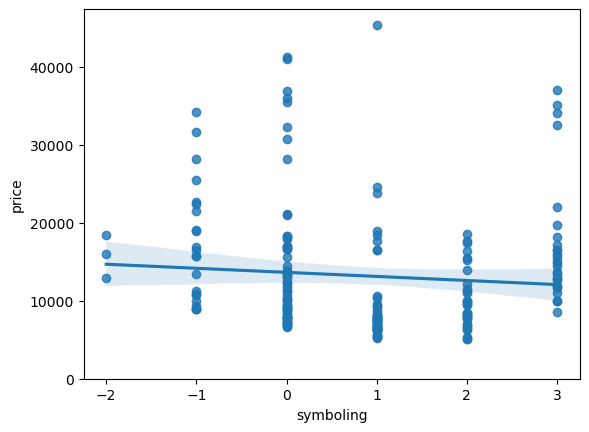

In [29]:
sns.regplot(x = "symboling", y = "price", data = df)
plt.ylim(0,)

In [30]:
df[["symboling","price"]].corr()

,symboling,price
symboling,1.000000,-0.082391
price,-0.082391,1.000000


****

**Normalized-Losses VS Price**

`Correlation Status : Positive Correlation`

`Correlation Value  : 0.13`

(0.0, 47414.1)

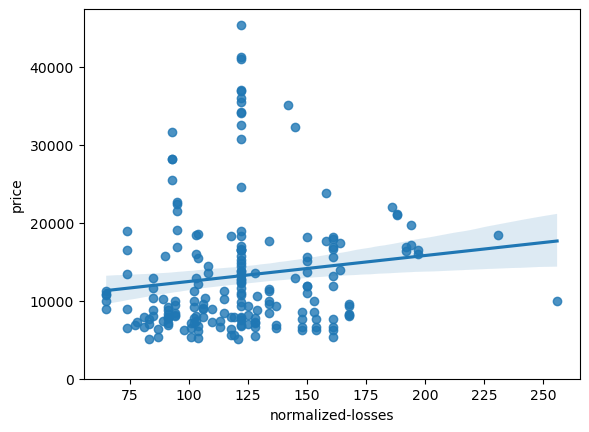

In [31]:
sns.regplot(x = "normalized-losses", y = "price", data = df)
plt.ylim(0,)

In [32]:
df[["normalized-losses","price"]].corr()

,normalized-losses,price
normalized-losses,1.000000,0.133999
price,0.133999,1.000000


*****

**Wheel Base VS Price**

`Correlation Status : Positive Correlation`

`Correlation Value  : 0.58`

(0.0, 47613.11493550787)

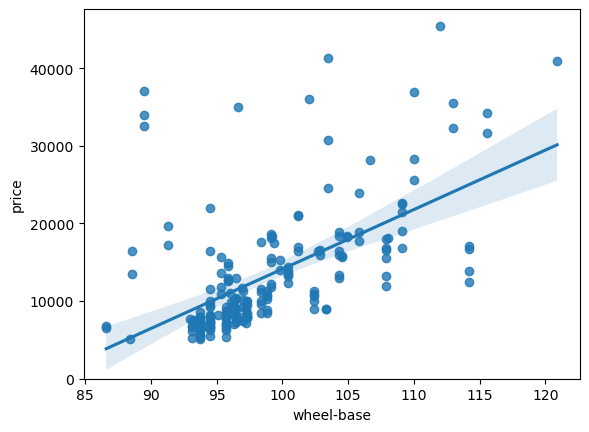

In [33]:
sns.regplot(x = "wheel-base", y = "price", data = df)
plt.ylim(0,)

In [34]:
df[["wheel-base","price"]].corr()

,wheel-base,price
wheel-base,1.000000,0.584642
price,0.584642,1.000000


*****

**Length VS Price**

`Correlation Status : Positive Correlation`

`Correlation Value : 0.69`

(0.0, 47871.15426338674)

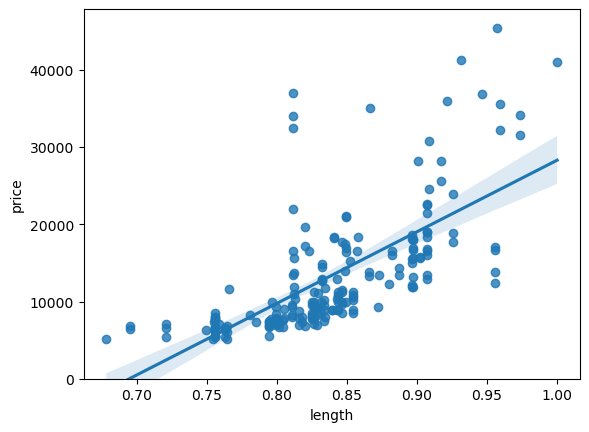

In [35]:
sns.regplot(x = "length", y = "price", data = df)
plt.ylim(0,)

In [36]:
df[["length","price"]].corr()

,length,price
length,1.000000,0.690628
price,0.690628,1.000000


****

**Width VS Price**

`Correlation Status : Positive Correlation`

`Correlation Value : 0.75`

(0.0, 47919.816100905155)

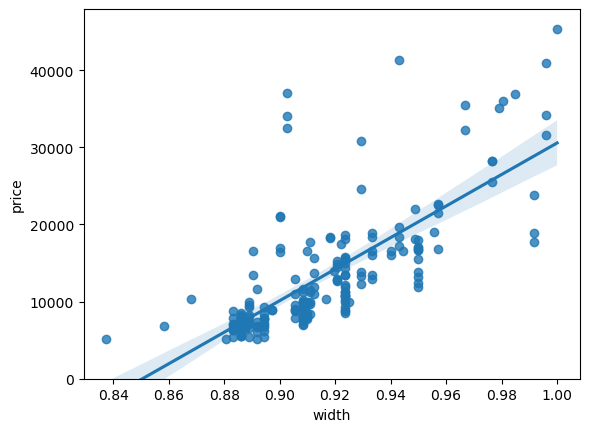

In [37]:
sns.regplot(x = "width", y = "price", data = df)
plt.ylim(0,)

In [41]:
df[["width", "price"]].corr()

,width,price
width,1.000000,0.751265
price,0.751265,1.000000


*****

**Height VS Price**

`Correlation Status : Positive Correlation`

`Correlation Value : 0.13`

(0.0, 47414.1)

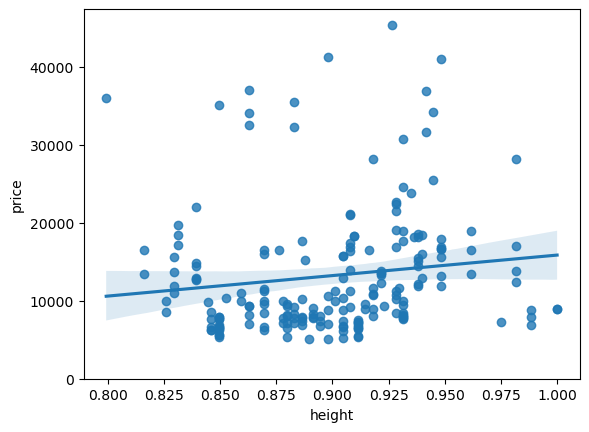

In [39]:
sns.regplot(x = "height", y = "price", data = df)
plt.ylim(0,)

In [40]:
df[["height", "price"]].corr()

,height,price
height,1.000000,0.135486
price,0.135486,1.000000


*****

**Curb-Weight VS Price**

`Correlation Status : Positive Correlation`

`Correlation Value : 0.83`

(0.0, 47757.56414712527)

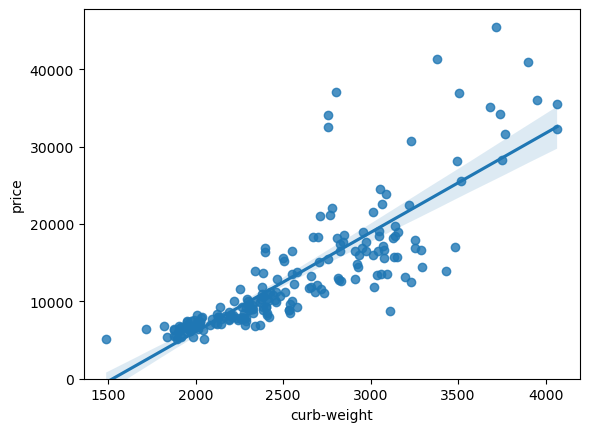

In [42]:
sns.regplot(x = "curb-weight", y = "price", data = df)
plt.ylim(0,)

In [43]:
df[["curb-weight", "price"]].corr()

,curb-weight,price
curb-weight,1.000000,0.834415
price,0.834415,1.000000


******

**Engine-Size VS Price**

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

`The correlation between 'engine-size' and 'price' and see that it's approximately 0.87.`

`Correlation Status : Positive Correlation`

`Correlation Value : 0.87`

(0.0, 53105.13191595677)

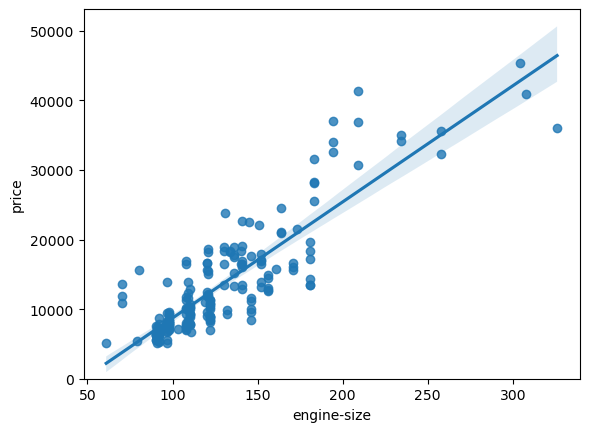

In [44]:
sns.regplot(x = "engine-size", y = "price", data = df)
plt.ylim(0,)

In [45]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


*****

**Bore VS Price**

`Correlation Status : Positive Correlation.`

`Correlation Value : 0.54`

           bore     price
bore   1.000000  0.543154
price  0.543154  1.000000


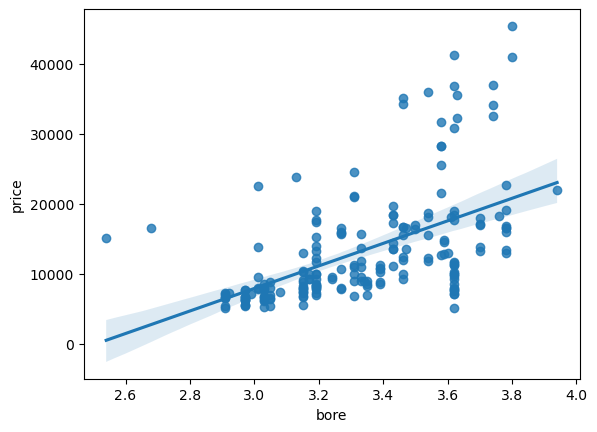

In [47]:
sns.regplot(x = "bore", y = "price", data = df)
print(df[["bore", "price"]].corr())

*****

**Stroke VS Compression-Ratio**

`Correlation Status : Positive Correlation`

`Correlation Value : 0.08`

          stroke     price
stroke  1.000000  0.082267
price   0.082267  1.000000


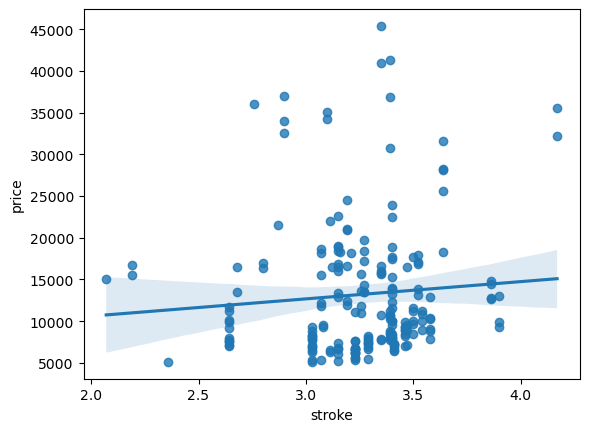

In [48]:
sns.regplot(x = "stroke", y = "price", data = df)
print(df[["stroke", "price"]].corr())

******

**Compression Ratio VS Price**

`Correlation Status : Positive Correlation`

`Correlation Value : 0.07`

                   compression-ratio     price
compression-ratio           1.000000  0.071107
price                       0.071107  1.000000


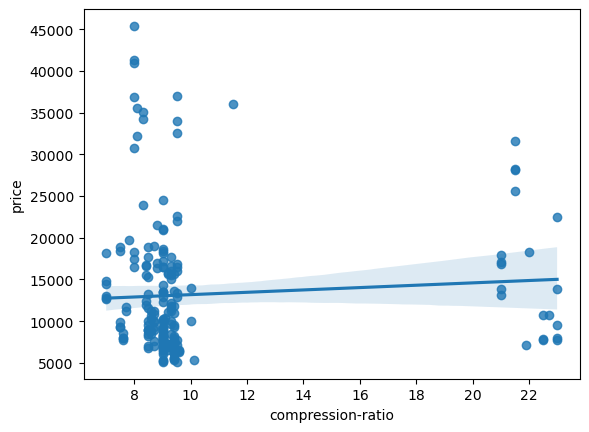

In [49]:
sns.regplot(x = "compression-ratio", y = "price", data = df)
print(df[["compression-ratio", "price"]].corr())

****

**Horse Power VS Price**

`Correlation Status : Positive Correlation`

`Correlation Value : 0.80`

            horsepower     price
horsepower    1.000000  0.809729
price         0.809729  1.000000


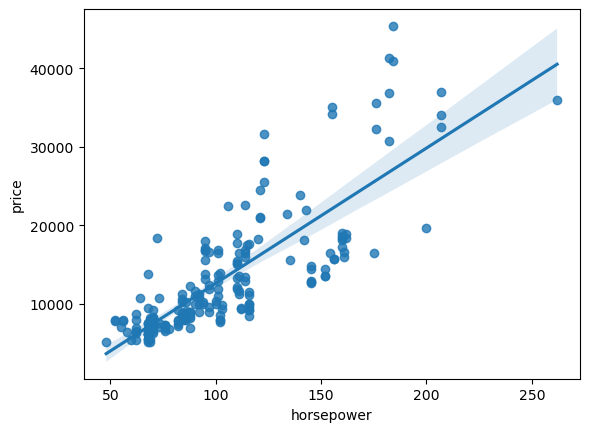

In [51]:
sns.regplot(x = "horsepower", y = "price", data = df)
print(df[["horsepower", "price"]].corr())

*****

**Peak RPM VS Price**

`Correlation Status : Negative Correlation`

`Correlation Value : -0.10`

          peak-rpm     price
peak-rpm  1.000000 -0.101542
price    -0.101542  1.000000


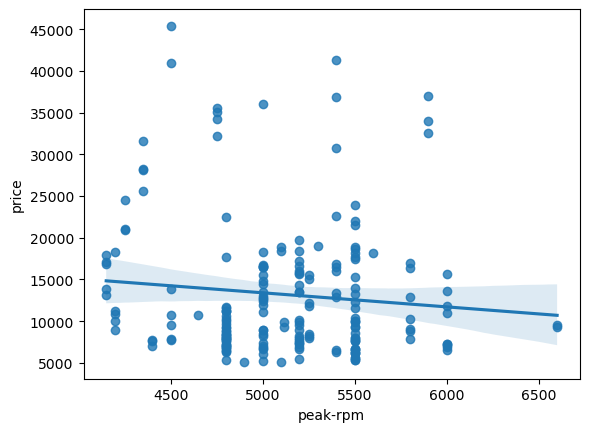

In [52]:
sns.regplot(x = "peak-rpm", y = "price", data = df)
print(df[["peak-rpm", "price"]].corr())

****    

**City MPG VS Price**

`Correlation Status : Negative Correlation`

`Correlation Value : -0.68`

          city-mpg     price
city-mpg  1.000000 -0.686571
price    -0.686571  1.000000


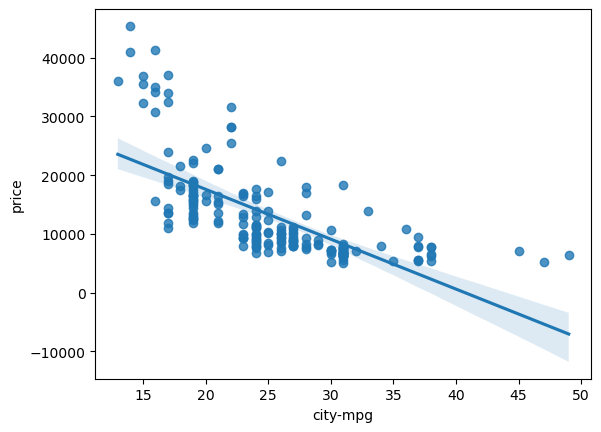

In [54]:
sns.regplot(x = "city-mpg", y = "price", data = df)
print(df[["city-mpg", "price"]].corr())

*****

**Highway MPG VS Price**

`Correlation Status : Negative Correlation`

`Correlation Value : -0.70`

             highway-mpg     price
highway-mpg     1.000000 -0.704692
price          -0.704692  1.000000


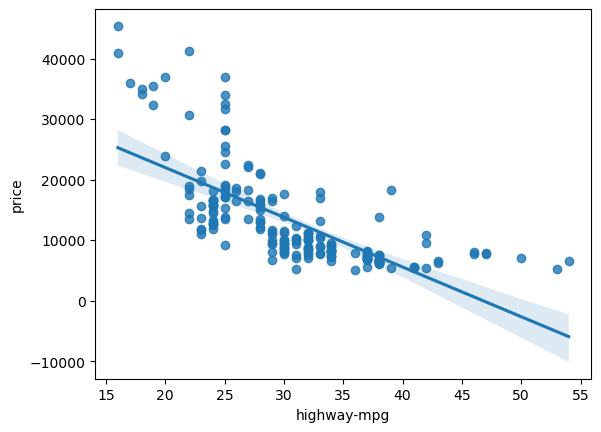

In [55]:
sns.regplot(x = "highway-mpg", y = "price", data = df)
print(df[["highway-mpg", "price"]].corr())

****

**city-L/100km VS Price**

`Correlation Status : Positive Correlation`

`Correlation Value : 0.78`

              city-L/100km     price
city-L/100km      1.000000  0.789898
price             0.789898  1.000000


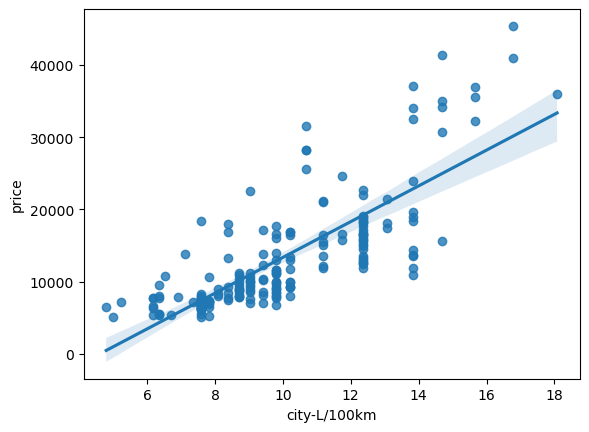

In [57]:
sns.regplot(x = "city-L/100km", y = "price", data = df)
print(df[["city-L/100km", "price"]].corr())

*****

**highway-L/100km VS Price**

`Correlation Status : Positive Correlation`

`Correlation Value : 0.80`

                 highway-L/100km     price
highway-L/100km         1.000000  0.801118
price                   0.801118  1.000000


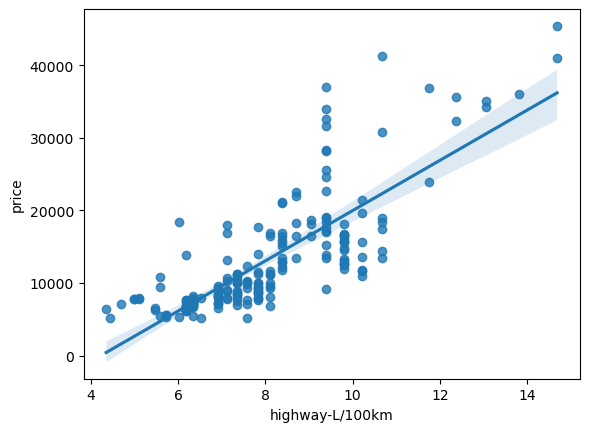

In [58]:
sns.regplot(x = "highway-L/100km", y = "price", data = df)
print(df[["highway-L/100km", "price"]].corr())

******

**fuel-type-diesel VS Price**

`Correlation Status : Positive Correlation`

`Correlation Value : 0.11`

                  fuel-type-diesel     price
fuel-type-diesel          1.000000  0.110326
price                     0.110326  1.000000


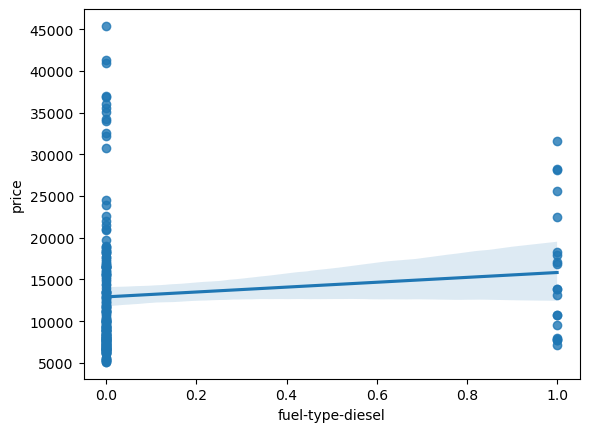

In [59]:
sns.regplot(x = "fuel-type-diesel", y = "price", data = df)
print(df[["fuel-type-diesel", "price"]].corr())

*****

**fuel-type-gas VS Price**

`Correlation Status : Negative Correlation`

`Correlation Value : -0.11`

               fuel-type-gas     price
fuel-type-gas       1.000000 -0.110326
price              -0.110326  1.000000


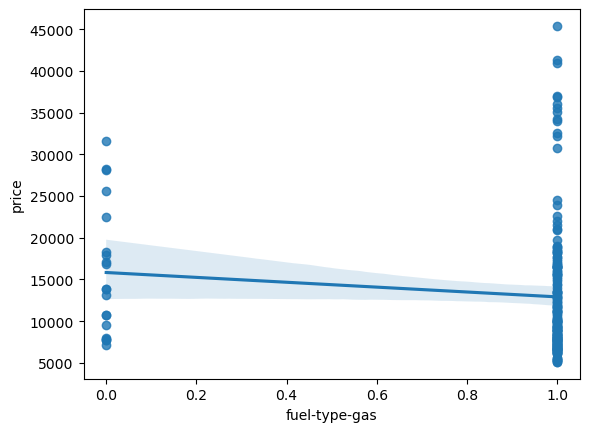

In [60]:
sns.regplot(x = "fuel-type-gas", y = "price", data = df)
print(df[["fuel-type-gas", "price"]].corr())

******

**aspiration-std VS Price**

`Correlation Status : Negative Correlation`

`Correlation Value : -0.17`

                aspiration-std     price
aspiration-std        1.000000 -0.179578
price                -0.179578  1.000000


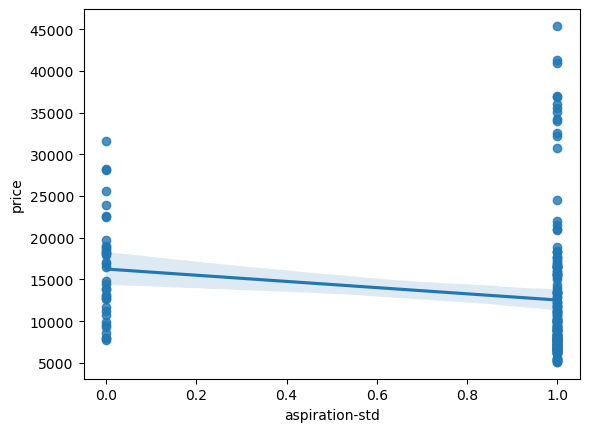

In [61]:
sns.regplot(x = "aspiration-std", y = "price", data = df)
print(df[["aspiration-std", "price"]].corr())

***

**aspiration-turbo VS Price**

`Correlation Status : Positive Correlation`

`Correlation Value : 0.17`

                  aspiration-turbo     price
aspiration-turbo          1.000000  0.179578
price                     0.179578  1.000000


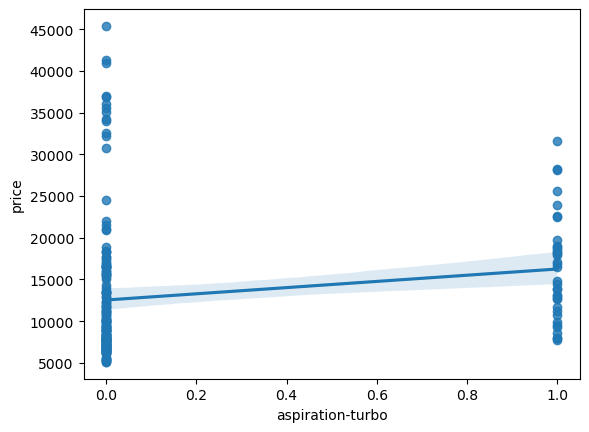

In [62]:
sns.regplot(x = "aspiration-turbo", y = "price", data = df)
print(df[["aspiration-turbo", "price"]].corr())

****

**Positively Related Attributes to the Price**

    + normalized-losses - 0.17
    + wheel-base - 0.58
    + length - 0.69
    + width - 0.75
    + height - 0.13
    + curb-weight - 0.83
    + engine-size - 0.87
    + bore - 0.54
    + stroke  - 0.08
    + compression-ratio - 0.07
    + horsepower - 0.80
    + city-L/100km - 0.78
    + highway-L/100km - 0.80
    + fuel-type-diesel - 0.11
    + aspiration-turbo - 0.17
    
**Negatively Related Attributes to the Price**

    + symboling  - 0.082
    + peak-rpm  - 0.10
    + city-mpg - 0.68
    + highway-mpg - 0.70
    + fuel-type-gas - 0.11
    + aspiration-std - 0.17

**CATEGORICAL VARIABLES**

+ These are variables that describe a 'characteristic' of a data unit, 
+ and are selected from a small group of categories. 
+ The categorical variables can have the type "object" or "int64". 
+ A good way to visualize categorical variables is by using boxplots.

**Relation Btw Make and Price**



In [66]:
## df["make"].value_counts()

<Axes: xlabel='make', ylabel='price'>

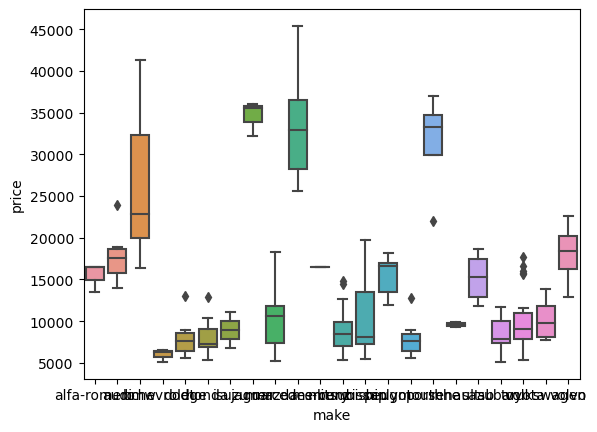

In [70]:
sns.boxplot(x = "make", y = "price", data = df)

<Axes: xlabel='num-of-doors', ylabel='price'>

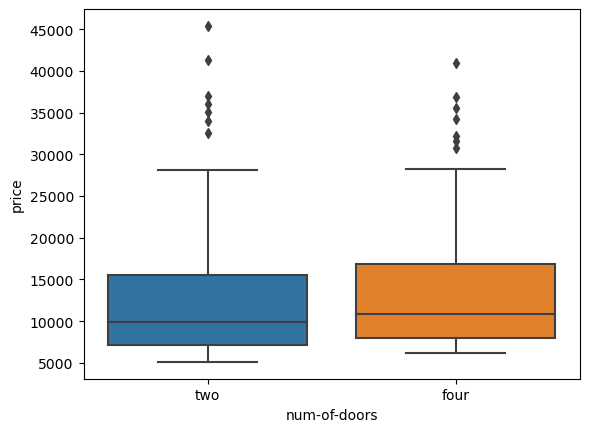

In [71]:
sns.boxplot(x = "num-of-doors", y = "price", data = df)

<Axes: xlabel='body-style', ylabel='price'>

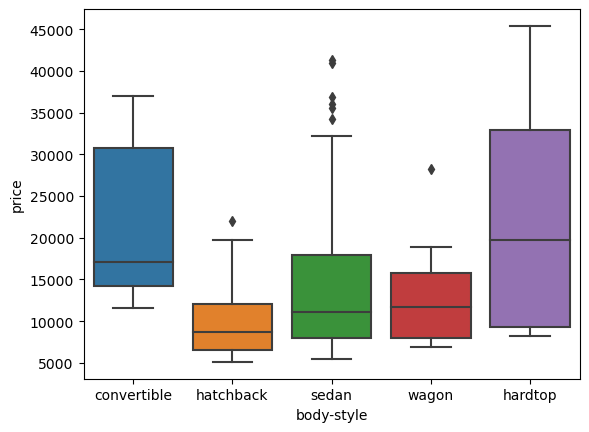

In [72]:
sns.boxplot(x = "body-style", y = "price", data = df)

<Axes: xlabel='drive-wheels', ylabel='price'>

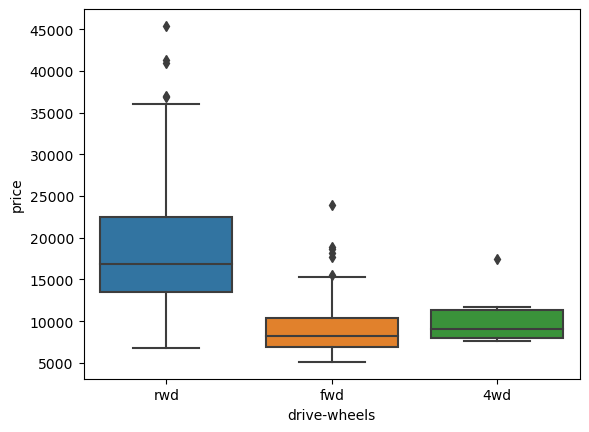

In [73]:
sns.boxplot(x = "drive-wheels", y = "price", data = df)

<Axes: xlabel='engine-location', ylabel='price'>

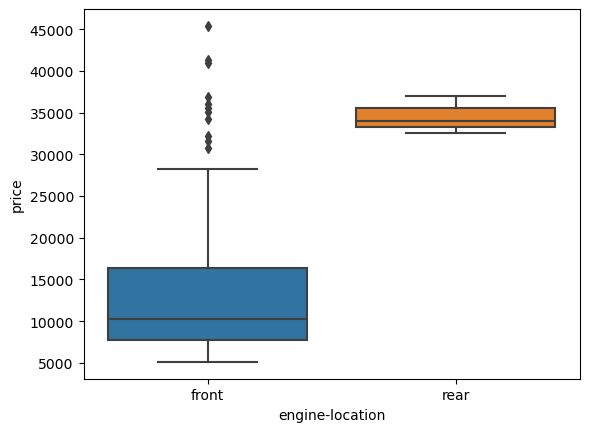

In [74]:
sns.boxplot(x = "engine-location", y = "price", data = df)

<Axes: xlabel='engine-type', ylabel='price'>

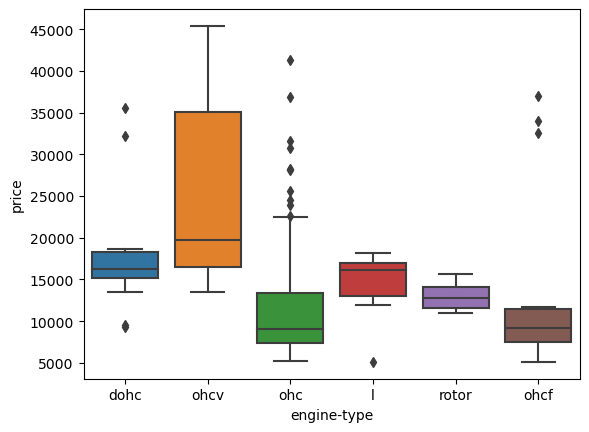

In [75]:
sns.boxplot(x = "engine-type", y = "price", data = df)

<Axes: xlabel='num-of-cylinders', ylabel='price'>

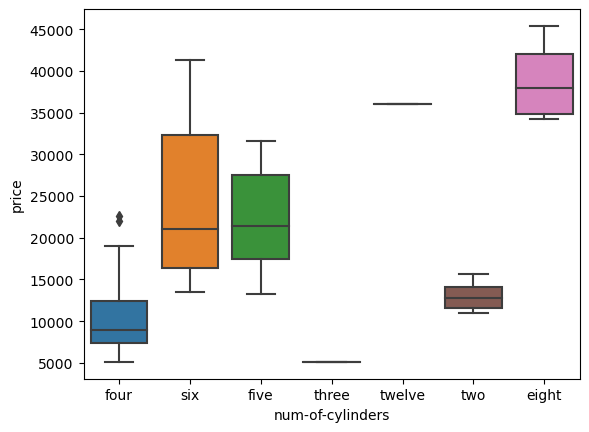

In [76]:
sns.boxplot(x = "num-of-cylinders", y = "price", data = df)

<Axes: xlabel='fuel-system', ylabel='price'>

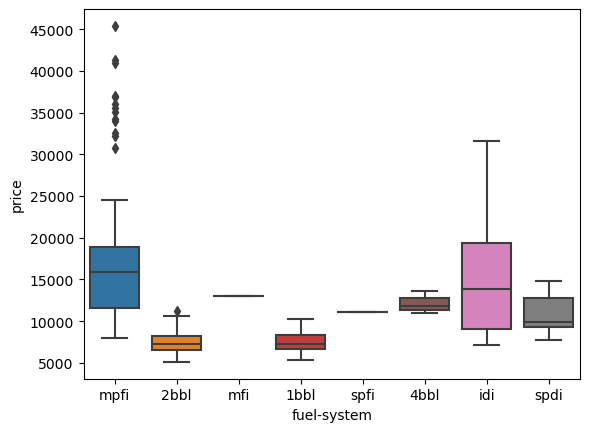

In [77]:
sns.boxplot(x = "fuel-system", y = "price", data = df)

<Axes: xlabel='horsepower-binned', ylabel='price'>

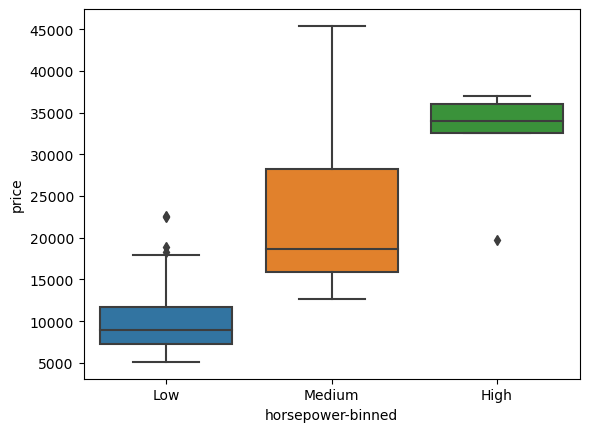

In [79]:
sns.boxplot(x = "horsepower-binned", y = "price", data = df)

From the above Box Plots.

	+ As the Car Companies Changes, there are bit of proce changes happening, even though most companies are sharing almost same price range between 5000 - 20000.

	+ Number of Doors reaaly doesn't matter. It seems the Price is almost similar in range.

	+ Body styles, hatchback, sedan and wagon sharing almost similar range of Price, but Convertible and Hardtop are Expensive.

	+ In Drive Wheels, rwd is the Expensive Vehicle.

	+ In Engine Location, Cars with Rear Engine more Expensive than front engines.

	+ In Engine Type, ohcv is the Expensive one, all other shares the same range.

	+ Num of Cylinders, Eight Cylinder Engines are Expensive. Six and Five as well. Others sharing the Same Range.

	+ Fuel System is almost similar for all classes considering the Price.

	+ Horsepower Binned, as Horse Power Increases, Price Increases.

**DESCRIPTIVE STATISTICAL ANALYSIS**

+ The describe function automatically computes basic statistics for all continuous variables. 
+ Any NaN values are automatically skipped in these statistics.

This will show:

+ the count of that variable
+ the mean
+ the standard deviation (std)
+ the minimum value
+ the IQR (Interquartile Range: 25%, 50% and 75%)
+ the maximum value

In [82]:
## statistics of all numerical values
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330711,3.256904,...,5117.587940,25.179104,30.686567,13207.129353,9.944145,8.044957,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,478.113178,6.423220,6.815150,7947.066342,2.534599,1.840739,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,5117.587940,24.000000,30.000000,10295.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


In [83]:
## statistics of all object variables
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,153


**VALUE COUNTS**

In [86]:
make_counts = df['make'].value_counts().to_frame()
make_counts.rename(columns = {"make" : "value_counts"}, inplace = True)
make_counts.index.name = "Make of The Car"
make_counts

,value_counts
Make of The Car,
toyota,32
nissan,18
mazda,17
mitsubishi,13
honda,13
volkswagen,12
subaru,12
peugot,11
volvo,11


In [87]:
num_of_doors_count = df['num-of-doors'].value_counts().to_frame()
num_of_doors_count.rename(columns = {"num-of-doors" : "value_counts"}, inplace = True)
num_of_doors_count.index.name = "Num-of-Doors"
num_of_doors_count

,value_counts
Num-of-Doors,
four,115
two,86


In [88]:
drive_wheels_count = df['drive-wheels'].value_counts().to_frame()
drive_wheels_count.rename(columns = {"drive-wheels" : "value_counts"}, inplace = True)
drive_wheels_count.index.name = "Drive Wheels"
drive_wheels_count

,value_counts
Drive Wheels,
fwd,118
rwd,75
4wd,8


In [85]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


In [89]:
engine_type_counts = df['engine-type'].value_counts().to_frame()
engine_type_counts.rename(columns={'engine-type': 'value_counts'}, inplace=True)
engine_type_counts.index.name = 'Engine Type'
engine_type_counts

,value_counts
Engine Type,
ohc,145
ohcf,15
ohcv,13
dohc,12
l,12
rotor,4


In [90]:
num_cylinders_counts = df['num-of-cylinders'].value_counts().to_frame()
num_cylinders_counts.rename(columns={'num-of-cylinders': 'value_counts'}, inplace=True)
num_cylinders_counts.index.name = 'Number of Cylinders'
num_cylinders_counts

,value_counts
Number of Cylinders,
four,157
six,24
five,10
two,4
eight,4
three,1
twelve,1


In [91]:
fuel_system_counts = df['fuel-system'].value_counts().to_frame()
fuel_system_counts.rename(columns={'fuel-system': 'value_counts'}, inplace=True)
fuel_system_counts.index.name = 'Fuel System'
fuel_system_counts

,value_counts
Fuel System,
mpfi,92
2bbl,64
idi,20
1bbl,11
spdi,9
4bbl,3
mfi,1
spfi,1


In [92]:
horse_power_binned_counts = df['horsepower-binned'].value_counts().to_frame()
horse_power_binned_counts.rename(columns={'horsepower-binned': 'value_counts'}, inplace=True)
horse_power_binned_counts.index.name = 'Horse Power'
horse_power_binned_counts

,value_counts
Horse Power,
Low,153
Medium,43
High,5


*****

**BASICS OF GROUPING**

+ The "groupby" method groups data by different categories. 
+ The data is grouped based on one or several variables, and analysis is performed on the individual groups.

+ From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, 
+ while 4-wheel and front-wheel are approximately the same in price.

+ You can also group by multiple variables. 
+ For example, let's group by both 'drive-wheels' and 'body-style'. 
+ This groups the dataframe by the unique combination of 'drive-wheels' and 'body-style'. 
+ We can store the results in the variable 'grouped_test1'.

In [99]:
## there are three different categories of drive wheels
print(df['drive-wheels'].unique())
## on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.
## We can select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".
df_group_one = df[["drive-wheels", "body-style", "price"]]
print(df_group_one.head())
## We can then calculate the average price for each of the different categories of data.
df_group_one = df_group_one.groupby(["drive-wheels"], as_index = False).mean(numeric_only = True)
df_group_one

['rwd' 'fwd' '4wd']
  drive-wheels   body-style    price
0          rwd  convertible  13495.0
1          rwd  convertible  16500.0
2          rwd    hatchback  16500.0
3          fwd        sedan  13950.0
4          4wd        sedan  17450.0


,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [102]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean(numeric_only = True)
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


+ This grouped data is much easier to visualize when it is made into a pivot table. 
+ A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. 
+ We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.

In [103]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [104]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

QUESTION

In [105]:
## Use the "groupby" function to find the average "price" of each car based on "body-style".
# grouping results
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


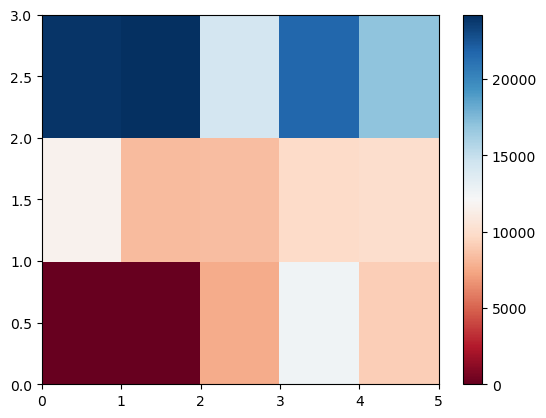

In [106]:
## Let's use a heat map to visualize the relationship between Body Style vs Price.
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

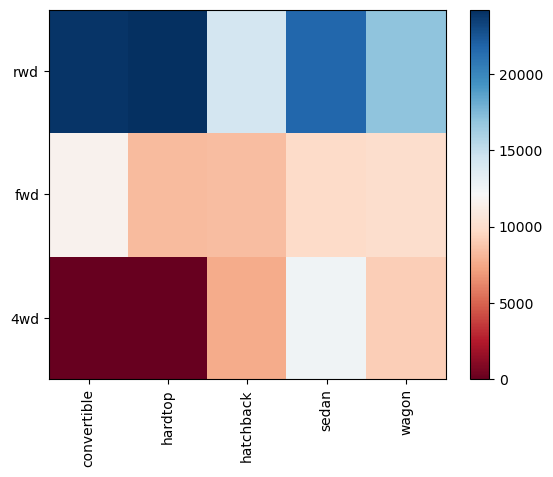

In [107]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

**CORRELATION AND CAUSATION**

+ `CORRELATION` : measure of the extent of interdependence between variables.
+ `CAUSATION` : the relationship between cause and effect between two variables.

It is important to know the difference between these two. 
+ Correlation does not imply causation. 
+ Determining correlation is much simpler the determining causation as causation may require independent experimentation.

**Pearson Correlation**

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

+ 1: Perfect positive linear correlation.
+ 0: No linear correlation, the two variables most likely do not affect each other.
+ -1: Perfect negative linear correlation.

In [109]:
df.corr(numeric_only = True)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,...,0.279719,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,...,0.239544,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,...,-0.360233,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,...,-0.286035,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,...,-0.245852,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,...,-0.309913,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,...,-0.279350,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,...,-0.256753,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,...,-0.267338,-0.582121,-0.591390,0.543154,0.554726,0.559197,0.054435,-0.054435,-0.227782,0.227782
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,...,-0.063720,-0.034079,-0.034741,0.082267,0.036285,0.047199,0.241033,-0.241033,-0.218190,0.218190


**P-value**

The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

+ `p-value is  < 0.001`: we say there is strong evidence that the correlation is significant.
+ `p-value is  < 0.05`: there is moderate evidence that the correlation is significant.
+ `p-value is  < 0.1`: there is weak evidence that the correlation is significant.
+ `p-value is  > 0.1`: there is no evidence that the correlation is significant

In [110]:
from scipy import stats

**Wheel Base VS Price**

calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'


Conclusion:
Since the p-value is  <  0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).

In [111]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


**HorsePower VS Price**

Conclusion:
Since the p-value is  <  0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).

In [112]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8097290352560286  with a P-value of P = 5.924001027593172e-48


**Length VS Price**

Conclusion:
Since the p-value is  <  0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

In [113]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483642  with a P-value of P = 8.016477466158759e-30


**Width VS Price**

Conclusion: Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

In [114]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.7512653440522674  with a P-value of P = 9.200335510481516e-38


**Curb-Weight VS Price**

Conclusion:
Since the p-value is  <  0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

In [115]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702845  with a P-value of P =  2.189577238893816e-53


**Engine Size VS Price**

Conclusion:
Since the p-value is  <  0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

In [116]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8723351674455186  with a P-value of P =  9.265491622197335e-64


**Bore VS Price**

Conclusion:
Since the p-value is  <  0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

In [117]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431537659807733  with a P-value of P =   8.051208825441245e-17


**City-mpg VS Price**

Conclusion:
Since the p-value is   <  0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.

In [118]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844677  with a P-value of P =  2.321132065567674e-29


**Highway mpg VS Price**

Conclusion: Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.

In [119]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.7495471144476358e-31


**ANOVA - Analysis of Variance**

The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

+ F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

+ P-value: P-value tells how statistically significant our calculated score value is.

If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.

Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.



In [120]:
df_gptest.head()

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0


In [123]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [124]:
## We can obtain the values of the method group using the method "get_group".
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [125]:
## We can use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.

# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


Reasonable results on F-test score and small p-value.

This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance

In [126]:
## fwd and rwd

f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [127]:
## 4wd and rwd

f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


In [128]:
## 4wd and fwd

f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


### Important Variables

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

+ Length
+ Width
+ Curb-weight
+ Engine-size
+ Horsepower
+ City-mpg
+ Highway-mpg
+ Wheel-base
+ Bore

Categorical variables:

+ Drive-wheels

As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.

*********